# Week 6 Notebook 2 SDG Case Study

In this notebook, we will use the APIs provided by the [United Nations Statistics Division](https://unstats.un.org/home/).

You will use the APIs to:
- send GET requests with a list of required countries as parameter values
- send POST requests to obtain a CSV file

First we must import the `requests` library.


In [189]:
import requests

## The UNSD SDGs API

The UNStats.org Sustainable Development Goals APIs are available here: https://unstats.un.org/SDGAPI/swagger/
You can see that some of the API endpoints are listed as POST, and some as GET.
We know how to use the GET requests, so let's try that first. 

### Getting the List of Goals

The first API we want to try is to get the list of goals.

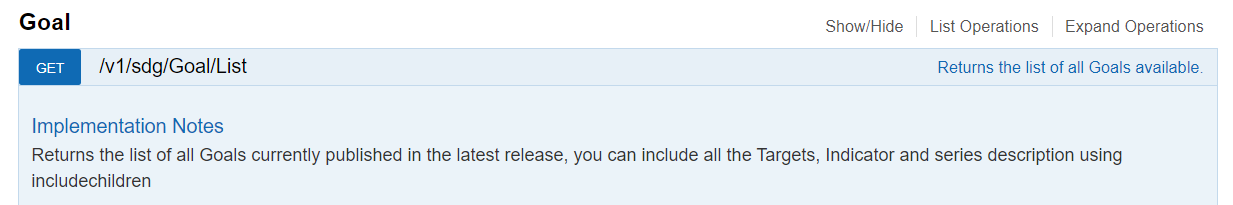

The Base URL is `http://unstats.un.org/SDGAPI`, so we will call the endpoint `/v1/sdg/Goal/List` 

In [190]:
#Returns the list of all Goals currently published in the latest release

goals = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Goal/List")
print(goals.status_code )


200


**Decoding JSON**

Since the status code is 200, we can try to decode the content:

In [3]:
goalsData = goals.json()
print(goalsData)

[{'code': '1', 'title': 'End poverty in all its forms everywhere', 'description': 'Goal 1 calls for an end to poverty in all its manifestations, including extreme poverty, over the next 15 years. All people everywhere, including the poorest and most vulnerable, should enjoy a basic standard of living and social protection benefits.', 'uri': '/v1/sdg/Goal/1'}, {'code': '2', 'title': 'End hunger, achieve food security and improved nutrition and promote sustainable agriculture', 'description': 'Goal 2 seeks to end hunger and all forms of malnutrition and to achieve sustainable food production by 2030. It is premised on the idea that everyone should have access to sufficient nutritious food, which will require widespread promotion of sustainable agriculture, a doubling of agricultural productivity, increased investments and properly functioning food markets.', 'uri': '/v1/sdg/Goal/2'}, {'code': '3', 'title': 'Ensure healthy lives and promote well-being for all at all ages', 'description': 

**Print Goals From the List Neatly**

We can see the data is returned as a list of dictionaries, so let's print a list of each goal using the 'title' key.

In [4]:
# Print each goal's code and title
for goal in goalsData:
    print(goal['code'], goal['title'])

1 End poverty in all its forms everywhere
2 End hunger, achieve food security and improved nutrition and promote sustainable agriculture
3 Ensure healthy lives and promote well-being for all at all ages
4 Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all
5 Achieve gender equality and empower all women and girls
6 Ensure availability and sustainable management of water and sanitation for all
7 Ensure access to affordable, reliable, sustainable and modern energy for all
8 Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all
9 Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation
10 Reduce inequality within and among countries
11 Make cities and human settlements inclusive, safe, resilient and sustainable
12 Ensure sustainable consumption and production patterns
13 Take urgent action to combat climate change and its impacts


### Get Indicators and Data Series

For each goal, there is a list of targets. There are specific indicators defined for the targets, that should be tracked by the various UN member countries. 

For each indicator, there is one or more data series that are used to reflect the indicator. This is what we are interested in.
Some series can be used for more than one Goal or Indicator. 

Let's try to get the indicators and series for one of the goals. You can change the required goal to another number between 1 and 17 as in the list above.

In [191]:
response = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Indicator/List")
indicatorlist = response.json()

# You can change the goal required
requiredGoal = '1'

# show indicators for this goal
for indicator in indicatorlist:
    if indicator['goal']==requiredGoal:
        print('\n',indicator['code'], indicator['description'])
    
        # Show data series for this indicator
        indicatorSeries = indicator['series']
        for series in indicatorSeries:
            print(series['code'], series['description'])
            


 1.1.1 Proportion of the population living below the international poverty line by sex, age, employment status and geographic location (urban/rural)
SI_POV_DAY1 Proportion of population below international poverty line (%)
SI_POV_EMP1 Employed population below international poverty line, by sex and age (%)

 1.2.1 Proportion of population living below the national poverty line, by sex and age
SI_POV_NAHC Proportion of population living below the national poverty line (%)

 1.2.2 Proportion of men, women and children of all ages living in poverty in all its dimensions according to national definitions
SD_MDP_MUHC Proportion of population living in multidimensional poverty (%)
SD_MDP_ANDI Average proportion of deprivations for people multidimensionally poor (%)
SD_MDP_MUHHC Proportion of households living in multidimensional poverty (%)
SD_MDP_CSMP Proportion of children living in child-specific multidimensional poverty (%)
SD_MDP_ANDIHH Average share of weighted deprivations of total h

### Getting the list of Countries

Another API we can use is to get the list of countries. This is because each country has a **geoAreaCode** that can be used as parameter values when getting data. Since there are so many countries, for this notebook we will only focus on some Asian countries and Australia, for comparison.

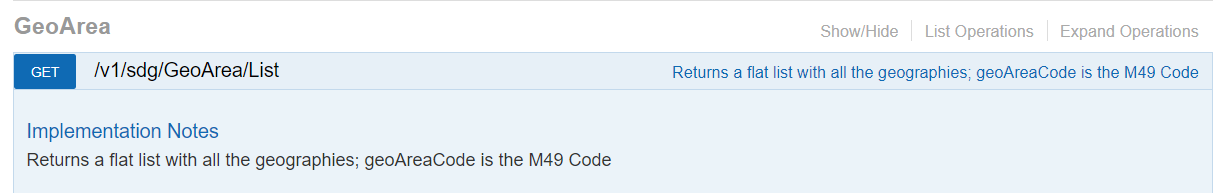

The endpoint for the GeoAreas is `/v1/sdg/GeoArea/List`.


In [192]:
# Get a flat list with all the geographies
regionsList = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/GeoArea/List")
regionsData = regionsList.json()
for region in regionsData:
    print(region['geoAreaCode'], region['geoAreaName'])


4 Afghanistan
248 Åland Islands
8 Albania
12 Algeria
16 American Samoa
20 Andorra
24 Angola
660 Anguilla
10 Antarctica
28 Antigua and Barbuda
32 Argentina
51 Armenia
533 Aruba
36 Australia
40 Austria
31 Azerbaijan
44 Bahamas
48 Bahrain
50 Bangladesh
52 Barbados
112 Belarus
56 Belgium
84 Belize
204 Benin
60 Bermuda
64 Bhutan
68 Bolivia (Plurinational State of)
70 Bosnia and Herzegovina
72 Botswana
74 Bouvet Island
76 Brazil
92 British Virgin Islands
86 British Indian Ocean Territory
96 Brunei Darussalam
100 Bulgaria
854 Burkina Faso
108 Burundi
116 Cambodia
120 Cameroon
124 Canada
132 Cabo Verde
136 Cayman Islands
140 Central African Republic
148 Chad
152 Chile
156 China
344 China, Hong Kong Special Administrative Region
446 China, Macao Special Administrative Region
162 Christmas Island
166 Cocos (Keeling) Islands
170 Colombia
174 Comoros
178 Congo
180 Democratic Republic of the Congo
184 Cook Islands
188 Costa Rica
384 Côte d'Ivoire
191 Croatia
192 Cuba
196 Cyprus
203 Czechia
208 Denm

**Store a List of Country geoAreaCodes**

You can see that some of the geoAreaCodes represent regions, and not just countries. We want to select particular Asian countries, so we will find all the geoAreaCodes for the countries that we are interested in and store them in a list.


In [194]:
# prepare list of required countries for comparison - you can add or remove countries as you wish
countriesWanted = ['Australia','Bangladesh','Cambodia','China','India',
                   'Indonesia','Japan','Malaysia','Philippines','Singapore',
                   'Sri Lanka','Thailand','Viet Nam']
countryCodes = []
regionsListData = regionsList.json()
for region in regionsListData:
    if region['geoAreaName'] in countriesWanted:
        countryCodes.append(region['geoAreaCode'])
print(countryCodes)

['36', '50', '116', '156', '356', '360', '392', '458', '608', '702', '144', '764', '704']


**Getting Data**

Now that we have the list of countries that we want and the series codes for the required goal, we can form our parameters and call the API to get data for the series.

In [195]:
# get the data for the defined series - you can change the series code
payload ={'seriesCode':'SI_POV_EMP1', 'areaCode':countryCodes}
poverty = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Series/Data", params= payload)

# decode and display the result
povertyDict = poverty.json()
povertyDict

{'size': 25,
 'totalElements': 1566,
 'totalPages': 63,
 'pageNumber': 1,
 'attributes': [{'id': 'Nature',
   'codes': [{'code': 'C', 'description': 'Country data', 'sdmx': 'C'},
    {'code': 'CA', 'description': 'Country adjusted data', 'sdmx': 'CA'},
    {'code': 'E', 'description': 'Estimated data', 'sdmx': 'E'},
    {'code': 'G', 'description': 'Global monitoring data', 'sdmx': 'G'},
    {'code': 'M', 'description': 'Modeled data', 'sdmx': 'M'},
    {'code': 'N', 'description': 'Non-relevant', 'sdmx': 'N'},
    {'code': 'NA', 'description': 'Data nature not available', 'sdmx': '_X'}]},
  {'id': 'Units',
   'codes': [{'code': 'PERCENT', 'description': 'Percentage', 'sdmx': 'PT'}]}],
 'dimensions': [{'id': 'Age',
   'codes': [{'code': '<1M', 'description': 'under 1 month old', 'sdmx': 'M0'},
    {'code': '<1Y', 'description': 'under 1 year old', 'sdmx': 'Y0'},
    {'code': '<5Y', 'description': 'under 5 years old', 'sdmx': 'Y0T4'},
    {'code': '<15Y', 'description': 'under 15 years 

**Checking Data Returned**

We can see that the keys of the dictionary are 'size', 'totalElements', 'totalPages', 'pageNumber', 'attributes' and 'data'. From the values of the 'totalPages' and 'pageNumber', we can see that this is page number 1 out of 63.


In [9]:
print('Page number :',povertyDict['pageNumber'])
print('Total Pages :',povertyDict['totalPages'])


Page number : 1
Total Pages : 63


**Show the Data**

Let's use a loop to go through what was returned by the 'data' key.


In [197]:
# Extract the values from the 'data' key
countryData = povertyDict['data']
for item in countryData:
    print(item['geoAreaName'], item['series'], item['timePeriodStart'], item['value'], item['dimensions'])

Bangladesh SI_POV_EMP1 2000.0 29.8 {'Age': '25+', 'Sex': 'BOTHSEX', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 29.9 {'Age': '15+', 'Sex': 'BOTHSEX', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 35.7 {'Age': '15-24', 'Sex': 'FEMALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 34.3 {'Age': '15+', 'Sex': 'FEMALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 33.8 {'Age': '25+', 'Sex': 'FEMALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 28.7 {'Age': '15-24', 'Sex': 'MALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 28.7 {'Age': '15+', 'Sex': 'MALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 28.6 {'Age': '25+', 'Sex': 'MALE', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2000.0 30.3 {'Age': '15-24', 'Sex': 'BOTHSEX', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2001.0 29.2 {'Age': '15-24', 'Sex': 'BOTHSEX', 'Reporting Type': 'G'}
Bangladesh SI_POV_EMP1 2001.0 28.8 {'Age': '15+', 'Sex': 'BOTHSEX', 'Reporting Type': 'G'}
Ban

There is only one country shown, but as we noticed this was only page number 1 out of 63 pages. We could call the API again in a loop using the number of pages as the range for the loop.

However there might be a better API we can use.

## Post Request API

A POST request is another type of API request. 

The difference between a GET request and a POST request is that POST is usually used to create data resources, while the GET request is to retrieve resources, so the keyword argument for sending parameters is different:
- For a POST request, use keyword argument `data`
- For a GET request, use the keyword argument `params`

Another API for retrieving the data series is `/v1/sdg/Series/DataCSV`, which returns a csv file.

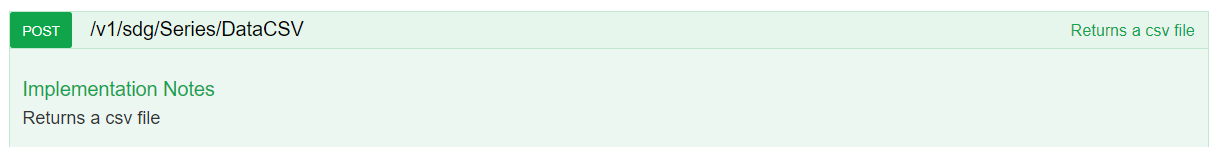

Let's send the same payload and get the results.

In [198]:
# Use the same payload to get a CSV file instead with POST request  
payload = {'seriesCodes':'SI_POV_EMP1','areaCodes':countryCodes}

# Call the API with a post request and pass the parameters using the data= keyword args
seriesData = requests.post("https://unstats.un.org/SDGAPI/v1/sdg/Series/DataCSV", data=payload)
print(seriesData.status_code)
print(seriesData.headers)

200
{'Content-Length': '1048576', 'Content-Type': 'application/octet-stream', 'Accept-Ranges': 'bytes', 'Server': 'Kestrel', 'Content-Disposition': "attachment; filename=series.csv; filename*=UTF-8''series.csv", 'X-Powered-By': 'ASP.NET', 'X-Xss-Protection': '1; mode=block', 'Content-Security-Policy': "object-src 'none' ; img-src 'self' https://*.twimg.com/ https://*.un.org/ https://*.twitter.com/ data:; frame-src 'self' https://whova.com https://d1keuthy5s86c8.cloudfront.net https://unb2c.b2clogin.com/ https://*.arcgis.com https://www.youtube.com https://youtube.com https://*.twitter.com https://fonts.googleapis.com https://maxcdn.bootstrapcdn.com https://flickrembed.com/ https://public.tableau.com https://unb2c.b2clogin.com/unb2c.onmicrosoft.com https://login.microsoftonline.com/* https://aadcdn.msauth.net/* https://login.microsoftonline.com/ https://www.podbean.com/  https://*.un.org/", 'Referrer-Policy': 'no-referrer-when-downgrade', 'Strict-Transport-Security': 'max-age=31536000; 

**Saving the CSV file**

If you look at the content type in the response headers, you will see that the response type is `application/octet-stream`. This means that it is a binary file, not text in JSON format. 

Since we know it is a CSV file, we can save it using our file handling techniques from Week 2.


In [199]:
# write the CSV content into a file
povertyFile = open('poverty.csv', 'wb')      # open a file for writing, in binary format
povertyFile.write(seriesData.content)        # write the content to the file
povertyFile.close()                          # close the file properly

**Exploring the Data with Pandas**

Now that the file has been saved to your current directory, you can view it using Microsoft Excel or even a notepad. 
However, we can also use Pandas to explore the data by reading it back in as a `DataFrame` object.

In [200]:
import pandas as pd
povertyData = pd.read_csv('poverty.csv')
povertyData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,[Age],[Nature],[Reporting Type],[Sex],[Units]
0,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,29.9,2000.0,...,NaN,NaN,"ILO modelled estimates, November 2020, availab...",NaN,NaN,15+,M,G,BOTHSEX,PERCENT
1,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,35.7,2000.0,...,NaN,NaN,"ILO modelled estimates, November 2020, availab...",NaN,NaN,15-24,M,G,FEMALE,PERCENT
2,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,34.3,2000.0,...,NaN,NaN,"ILO modelled estimates, November 2020, availab...",NaN,NaN,15+,M,G,FEMALE,PERCENT
3,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,33.8,2000.0,...,NaN,NaN,"ILO modelled estimates, November 2020, availab...",NaN,NaN,25+,M,G,FEMALE,PERCENT
4,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,28.7,2000.0,...,NaN,NaN,"ILO modelled estimates, November 2020, availab...",NaN,NaN,15-24,M,G,MALE,PERCENT


In [201]:
# Check column info
povertyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Goal               1566 non-null   float64
 1   Target             1566 non-null   float64
 2   Indicator          1566 non-null   object 
 3   SeriesCode         1566 non-null   object 
 4   SeriesDescription  1566 non-null   object 
 5   GeoAreaCode        1566 non-null   float64
 6   GeoAreaName        1566 non-null   object 
 7   TimePeriod         1566 non-null   float64
 8   Value              1566 non-null   float64
 9   Time_Detail        1566 non-null   float64
 10  TimeCoverage       0 non-null      float64
 11  UpperBound         0 non-null      float64
 12  LowerBound         0 non-null      float64
 13  BasePeriod         0 non-null      float64
 14  Source             1566 non-null   object 
 15  GeoInfoUrl         0 non-null      float64
 16  FootNote           0 non

**Missing Values**

Looks like we have to do some data cleaning on the missing values. We can see the values for Age, Nature, Reporting Type, Sex and Units are non-null. We can also count the number of null values for each column:


In [202]:
# Count number of missing values for each column
povertyData.isnull().sum()

Goal                    1
Target                  1
Indicator               1
SeriesCode              1
SeriesDescription       1
GeoAreaCode             1
GeoAreaName             1
TimePeriod              1
Value                   1
Time_Detail             1
TimeCoverage         1567
UpperBound           1567
LowerBound           1567
BasePeriod           1567
Source                  1
GeoInfoUrl           1567
FootNote             1567
[Age]                   1
[Nature]                1
[Reporting Type]        1
[Sex]                   1
[Units]                 1
dtype: int64

Out of 1567 entries, there are 1567 values for the columns TimeCoverage, UpperBound, LowerBound, BasePeriod, GeoInfoUrl and FootNote, which means these values are all null.

There is also one null value for each of the other columns. Let's drop all the columns and rows which contain ALL missing values.


In [203]:
# Drop Null values for axis=1, how='all' means drop the columns with ALL null values
povertyData.dropna(axis=1, how="all", inplace=True)

# Now drop all rows with ALL null values
povertyData.dropna(axis=0, how="all", inplace=True)

povertyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 0 to 1565
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Goal               1566 non-null   float64
 1   Target             1566 non-null   float64
 2   Indicator          1566 non-null   object 
 3   SeriesCode         1566 non-null   object 
 4   SeriesDescription  1566 non-null   object 
 5   GeoAreaCode        1566 non-null   float64
 6   GeoAreaName        1566 non-null   object 
 7   TimePeriod         1566 non-null   float64
 8   Value              1566 non-null   float64
 9   Time_Detail        1566 non-null   float64
 10  Source             1566 non-null   object 
 11  [Age]              1566 non-null   object 
 12  [Nature]           1566 non-null   object 
 13  [Reporting Type]   1566 non-null   object 
 14  [Sex]              1566 non-null   object 
 15  [Units]            1566 non-null   object 
dtypes: float64(6), object(10

**Converting Data Types**

Let's convert the TimePeriod to an integer rather than a float.


In [74]:
# Clean up the Time Periods so that they are dates
povertyData['TimePeriod'] = povertyData['TimePeriod'].astype(int)

**Check Category Levels**

We also want to check the number of values for each of the categories of interest:

In [204]:
print(povertyData['GeoAreaName'].value_counts())
print(povertyData['TimePeriod'].value_counts())
print(povertyData['[Age]'].value_counts())
print(povertyData['[Sex]'].value_counts())

Bangladesh     171
Sri Lanka      171
China          171
India          171
Indonesia      171
Malaysia       171
Viet Nam       171
Thailand       171
Philippines    144
Cambodia        54
Name: GeoAreaName, dtype: int64
2011.0    90
2004.0    90
2007.0    90
2008.0    90
2010.0    90
2000.0    81
2017.0    81
2016.0    81
2015.0    81
2014.0    81
2013.0    81
2009.0    81
2001.0    81
2005.0    81
2003.0    81
2002.0    81
2018.0    81
2012.0    72
2006.0    72
Name: TimePeriod, dtype: int64
15+      522
15-24    522
25+      522
Name: [Age], dtype: int64
BOTHSEX    522
FEMALE     522
MALE       522
Name: [Sex], dtype: int64


**Renaming Columns**

We might want to rename some of the columns so that it's clearer and easier for us to use
- GeoAreaName as Country
- TimePeriod as Year
- Columns with square brackets `[]` around the names


In [205]:
# Rename the columns, inplace.
povertyData.rename(columns={'GeoAreaName':'Country', 'TimePeriod':'Year','[Age]':'Age','[Sex]':'Sex'}, inplace=True)
povertyData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Country,Year,Value,Time_Detail,Source,Age,[Nature],[Reporting Type],Sex,[Units]
0,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,29.9,2000.0,"ILO modelled estimates, November 2020, availab...",15+,M,G,BOTHSEX,PERCENT
1,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,35.7,2000.0,"ILO modelled estimates, November 2020, availab...",15-24,M,G,FEMALE,PERCENT
2,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,34.3,2000.0,"ILO modelled estimates, November 2020, availab...",15+,M,G,FEMALE,PERCENT
3,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,33.8,2000.0,"ILO modelled estimates, November 2020, availab...",25+,M,G,FEMALE,PERCENT
4,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,28.7,2000.0,"ILO modelled estimates, November 2020, availab...",15-24,M,G,MALE,PERCENT


**Separating the Data**

Looking at the data values we can see that some of it will be redundant
- the Age of 15+ encompasses both 15 - 24 and 25+
- BOTHSEX encompasses both FEMALE and MALE

So we should decide which data we want to include for analysis.'

Let's separate it into two sets 
- one with the combined data for 15+ and BOTHSEX
- one with the breakdown by age and SEX

We can do this with pandas, by defining two separate data sets:

- combined data where the `[Age]` value is '15+' and `[Sex]` value is 'BOTHSEX'
- the detailed data where it does not fit the criteria for the combined data

In [206]:
# Separate into two data sets
combinedData = povertyData[(povertyData['Age']=='15+') & (povertyData['Sex']=='BOTHSEX')]
detailedData = povertyData[(povertyData['Age']!='15+') & (povertyData['Sex']!='BOTHSEX')]



Let's check what the two data sets look like. We didn't change all the column names, so you can do that if you want.

In [207]:
combinedData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Country,Year,Value,Time_Detail,Source,Age,[Nature],[Reporting Type],Sex,[Units]
0,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,29.9,2000.0,"ILO modelled estimates, November 2020, availab...",15+,M,G,BOTHSEX,PERCENT
10,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2001.0,28.8,2001.0,"ILO modelled estimates, November 2020, availab...",15+,M,G,BOTHSEX,PERCENT
21,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2002.0,29.1,2002.0,"ILO modelled estimates, November 2020, availab...",15+,M,G,BOTHSEX,PERCENT
34,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2003.0,27.6,2003.0,"ILO modelled estimates, November 2020, availab...",15+,M,G,BOTHSEX,PERCENT
38,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2004.0,24.9,2004.0,"ILO modelled estimates, November 2020, availab...",15+,M,G,BOTHSEX,PERCENT


In [208]:
detailedData.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Country,Year,Value,Time_Detail,Source,Age,[Nature],[Reporting Type],Sex,[Units]
1,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,35.7,2000.0,"ILO modelled estimates, November 2020, availab...",15-24,M,G,FEMALE,PERCENT
3,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,33.8,2000.0,"ILO modelled estimates, November 2020, availab...",25+,M,G,FEMALE,PERCENT
4,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,28.7,2000.0,"ILO modelled estimates, November 2020, availab...",15-24,M,G,MALE,PERCENT
7,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2000.0,28.6,2000.0,"ILO modelled estimates, November 2020, availab...",25+,M,G,MALE,PERCENT
11,1.0,1.1,1.1.1,SI_POV_EMP1,Employed population below international povert...,50.0,Bangladesh,2001.0,27.5,2001.0,"ILO modelled estimates, November 2020, availab...",25+,M,G,MALE,PERCENT


**Plotting**

Let's create the plots with the data using Matplotlib.

We can use the combined data to compare the data values over time, for the different countries.

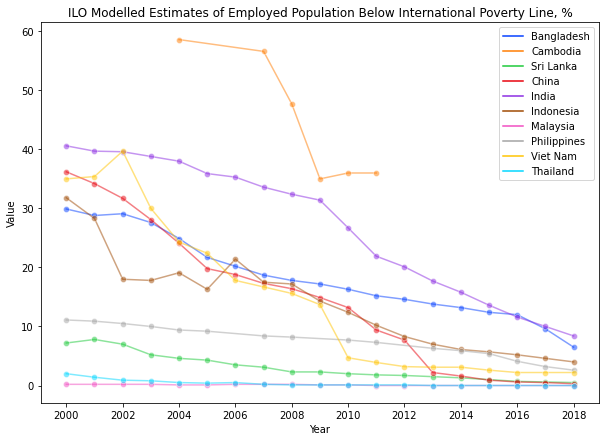

In [209]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot using the combined data
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.lineplot(data = combinedData, x= 'Year', y= 'Value',hue = 'Country', marker='o', alpha=0.5, palette='bright')
plt.legend(bbox_to_anchor=(1,1))
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.set_title("ILO Modelled Estimates of Employed Population Below International Poverty Line, %")
plt.show()

For the detailed data, we could create subplots or facets to compare them better.

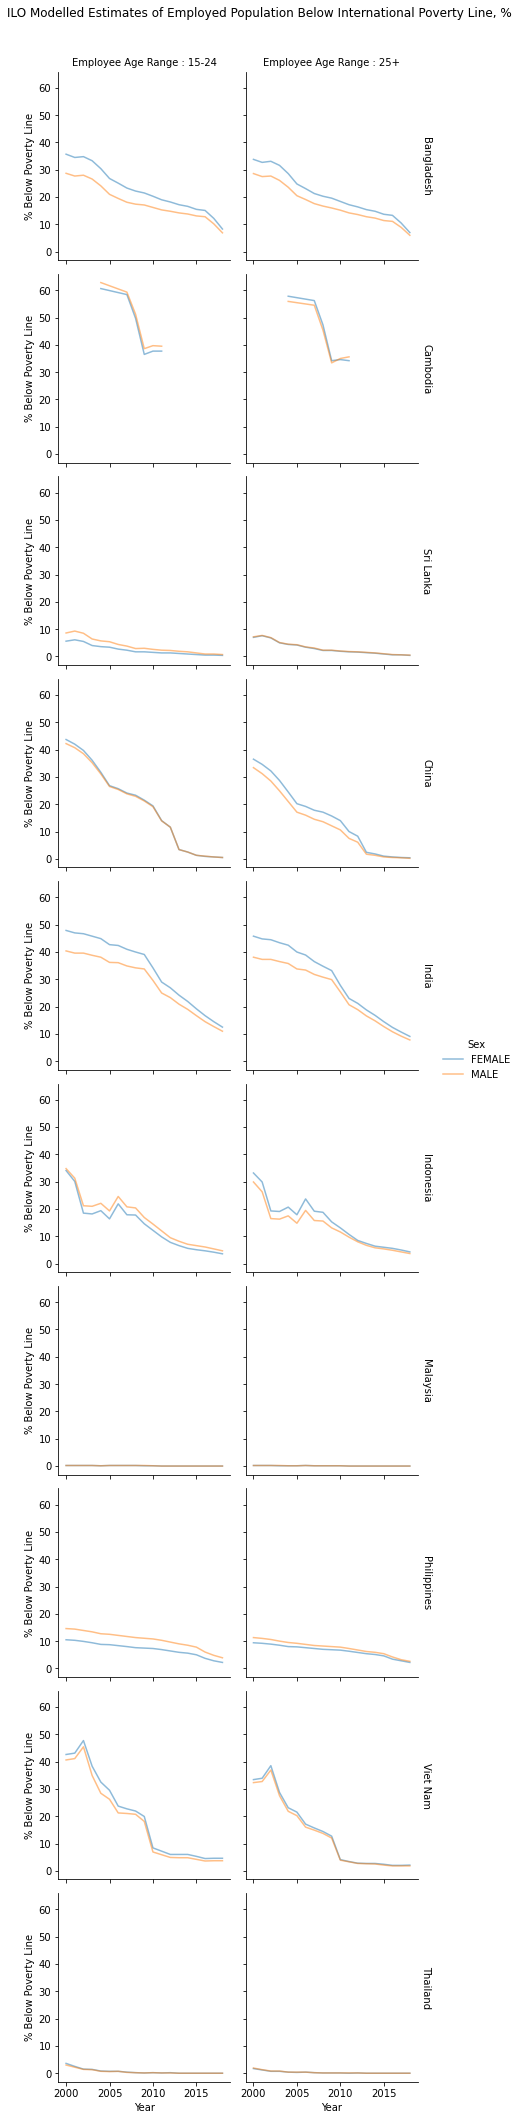

In [126]:
# Use FacetGrid to compare countries, Employee Age Range and Sex
g = sns.FacetGrid(data = detailedData, row='Country', col='Age', hue='Sex',  margin_titles=True)
g.map(sns.lineplot, 'Year', 'Value',alpha=0.5)
g.set_axis_labels("Year", "% Below Poverty Line")
g.set_titles(col_template="Employee Age Range : {col_name}", row_template="{row_name}")
g.add_legend()
g.fig.suptitle('ILO Modelled Estimates of Employed Population Below International Poverty Line, %')
g.fig.subplots_adjust(top=0.95)


You can try out other plots with the data, or use a different indicator with the above code.

Always check the data that is returned from the API and consider how it has been arranged and what the values mean.



## Exercises

Let's try to get data for a different goal, for example Goal 4: Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all

**Q1 Get Series for Goal 4**

Using the `https://unstats.un.org/SDGAPI/v1/sdg/Indicator/List` API, show the list of series for this Goal.

In [220]:
# Q1 get the indicators for Goal 4



**Q2 Get CSV File**

Let's use the indicator 4.4.1 Proportion of youth and adults with information and communications technology (ICT) skills, by type of skill. 
- What is the series code?
- Use the same country codes as before

Call the POST request to get the data.

In [221]:
# Q2 Get a CSV file  with POST request  


# Call the API with a post request and pass the parameters using the data= keyword args


**Q3 Save the CSV data**

Save the data into a file titled 'ictSkills.csv'.

In [222]:
# Q3 write the CSV content into a file



**Q4 Read from the file using Pandas**

Read the csv file into a DataFrame called `ictSkillsData` and view it.


In [223]:
#Q4 Read the file into a variable called ictSkillsData


**Q5 Drop Missing Values**

Drop the missing values for the rows and columns which contain ALL null values

In [224]:
# Q5 Drop Missing Values


**Q6 Get Value Counts**

Check the value counts for the TimePeriod, Sex, Type of Skill  and GeoAreaNames.

In [226]:
#Q6 Get Value Counts


**Q7 Filter the Data**

Create a subset that includes data for only the latest three years, and 'MALE' and 'FEMALE'

In [227]:
# Q7 select only data where sex is NOT 'BOTHSEX' and the TimePeriod is 2017 or later


**Q7 Plot the data by sex**

Create a barplot of the data to compare the proportion of youths with ict skills by country, type of skill and sex. 
Example: Using a facetgrid with showing barplots of Value by Sex
- column = GeoAreaName
- row = Type of Skill
- hue = Sex

In [228]:
# Q7 Use FacetGrid to compare countries, Employee Age Range and Sex


**Identifying Type of Skill**

The description of the type of skill can be found in the dimensions for the series. 

You can use the `https://unstats.un.org/SDGAPI/v1/sdg/Series/Data` API with the series code and any country code as the parameters to view the dimensions for the series.


In [182]:
# get the data for the defined series - you can change the series code
payload ={'seriesCode':'SE_ADT_ACTS', 'areaCode':'458'}
response = requests.get("https://unstats.un.org/SDGAPI/v1/sdg/Series/Data", params= payload)
seriesInfo = response.json()


[{'id': 'Age',
  'codes': [{'code': '<1M', 'description': 'under 1 month old', 'sdmx': 'M0'},
   {'code': '<1Y', 'description': 'under 1 year old', 'sdmx': 'Y0'},
   {'code': '<5Y', 'description': 'under 5 years old', 'sdmx': 'Y0T4'},
   {'code': '<15Y', 'description': 'under 15 years old', 'sdmx': 'Y0T14'},
   {'code': '<18Y', 'description': 'under 18 years old', 'sdmx': 'Y0T17'},
   {'code': 'ALLAGE',
    'description': 'All age ranges or no breaks by age',
    'sdmx': '_T'},
   {'code': '1-14', 'description': '1 to 14 years old', 'sdmx': 'Y1T14'},
   {'code': '1-17', 'description': '1 to 17 years old', 'sdmx': 'Y1T17'},
   {'code': '5-14', 'description': '5 to 14 years old', 'sdmx': 'Y5T14'},
   {'code': '5-17', 'description': '5 to 17 years old', 'sdmx': 'Y5T17'},
   {'code': '5+', 'description': '5 years old and over', 'sdmx': 'Y_GE5'},
   {'code': '6-14', 'description': '6 to 14 years old', 'sdmx': 'Y6T14'},
   {'code': '6-17', 'description': '6 to 17 years old', 'sdmx': 'Y6T17'}

In [187]:
for dim in seriesInfo['dimensions']:
    if (dim['id']=='Type of skill'):
        skillcodes = dim['codes']


In [188]:
# Now you can use these as a reference in to the plot.
for skill in skillcodes:
    print(skill['code'], skill['description'])

ARSP Using basic arithmetic formula in a spreadsheet
COPA Using copy and paste tools to duplicate or move information within a document
EMAIL Sending e-mails with attached files
EPRS Creating electronic presentations with presentation software
INST Connecting and installing new devices
PCPR Writing a computer program using a specialized programming language
SOFT Finding, downloading, installing and configuring software
TRAF Transferring files between a computer and other devices
CMFL Copying or moving a file or folder
_T No breakdown
